In [10]:
pip install Graphviz

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier , export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#setting random seed.
seed = 10

In [12]:
from sklearn import datasets
iris = datasets.load_iris()
df=pd.read_csv('C:\\Users\\SONIC\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv',
                           delimiter=',',
                           header=0,
                           names=['sepal length (cm)','sepal width (cm)',
                                 'petal length (cm)','petal width (cm)','Variety']
                           )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
le = LabelEncoder()
le.fit(df['Variety'].values)
y = le.transform(df['Variety'].values)
x = df.drop('Variety', axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.34, stratify=y, random_state=seed)

In [17]:
tree = DecisionTreeClassifier(criterion='gini',
                             min_samples_leaf=5,
                             min_samples_split=5,
                             max_depth=None,
                            random_state=seed )
tree.fit(x_train, y_train )
y_pred = tree.predict(x_test)
accuracy = accuracy_score(y_test , y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.9615384615384616


Confusion Matrix is
[[17  0  0]
 [ 0 17  1]
 [ 0  1 16]]


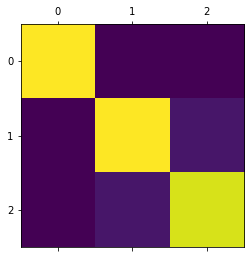

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
print('Confusion Matrix is')
print(confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.show()

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=df['Variety'].unique()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        18
           2       0.94      0.94      0.94        17

    accuracy                           0.96        52
   macro avg       0.96      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52



In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'

def plot_tree(tree, dataframe, label_col, label_encoder, plot_title):
    label_names = ['setosa','virginica','versicolour']
    grapgh_data = export_grapghviz(tree,
                                  feature_names=dataframe.drop(label_col, axis=1).columns,
                                  class_names=label_names,
                                  filled=true,
                                  rounded=true,
                                  out_file=none)
    
